# Setting up a SWAT Connection for Python

In [30]:
import swat
import os

# Get Information for the Connection
file = open("/home/shared_data/Authorization_Code_URL.txt")
# read the file as a list
data = file.readlines()
# close the file
file.close()

baseURL = data[0].split('/')[2]

directory = os.getcwd()
file = open(directory + "/access_token.txt")
# read the file as a list
data = file.readlines()
# close the file
file.close()

code = data[0]

# Establish a CAS session
conn = swat.CAS(f"https://{baseURL}/cas-shared-default-http", username=None, password=code)

# Verify connection details
conn

CAS('azureuse011233.my-trials.sas.com', 443, protocol='https', name='py-session-3', session='e04c993a-77f3-5749-8ffe-2af1fdfd5f7f')

## Create a reference to in-memory tables

In [31]:
gyms = conn.CASTable("gym_summary", caslib="public")
members = conn.CASTable("members", caslib="public")

## Use pandas code and functions on the CAS tables as if they were standard dataframes

These will be translated into CAS actions, and alter the underlying table in CAS

In [32]:
# Get head data from table, methods similar to pandas
gyms.head()

,country,Gym_ID,Gym_Name,Gym_Latitude,Gym_Longitude,Gym_Size,Gym_Current_Members,Gym_Target_Members,members_leaving,members_new,members_net_change,monthly_fee,monthly_fixed_cost,total_joni_fees,total_revenue
0,England,BFG01,Barnet,51.652931,-0.199610,Medium,2376.0,2330.0,1115.0,2731.0,1616.0,2500055.0,2314427.89,48440.0,2548495.0
1,England,BFG02,Barnsley,53.552929,-1.481270,Medium,2229.0,2373.0,1073.0,2533.0,1460.0,2346065.0,1895903.91,45025.0,2391090.0
2,England,BFG03,Bath,51.382270,-2.367620,Medium,1917.0,1861.0,980.0,2226.0,1246.0,2038535.0,1880651.47,38715.0,2077250.0
3,England,BFG04,Bedford,52.135712,-0.468040,Medium,2861.0,2950.0,1541.0,3405.0,1864.0,2910675.0,2499591.20,58070.0,2968745.0
4,England,BFG05,Blackpool,53.812774,-3.036945,Medium,1811.0,1794.0,1052.0,2252.0,1200.0,1832165.0,1721880.35,38250.0,1870415.0


In [33]:
# Work with the tables as if they were pandas dataframes

gyms["achieving_target"] = gyms["members_net_change"] > 0

In [34]:
members_subset = members[members.country == "England"]
members_subset.head()

,Gym_ID,Gym_Name,Country,Gym_Latitude,Gym_Longitude,Gym_Target_Members,Gym_Current_Members,Gym_Size,member_type,member_id,total_payments,monthly_fee,height,weight,avg_visits_week,distance_travelled,gender,ageband,gp_ref,avg_visit_length
0,BFG01,Barnet,England,51.652931,-0.19961,2330.0,2376.0,Medium,Standard,BFG01_00001,1955.0,40.0,169.1,102.1,2.056198,1.34,Male,65+,N,85.0
1,BFG01,Barnet,England,51.652931,-0.19961,2330.0,2376.0,Medium,Standard,BFG01_00002,1425.0,40.0,179.1,84.0,0.172183,1.33,Male,25-29,N,58.0
2,BFG01,Barnet,England,51.652931,-0.19961,2330.0,2376.0,Medium,Standard,BFG01_00003,910.0,40.0,171.2,86.5,6.136637,3.40,Male,25-29,N,81.0
3,BFG01,Barnet,England,51.652931,-0.19961,2330.0,2376.0,Medium,Gold,BFG01_00004,135.0,60.0,154.3,53.1,1.004649,4.70,Female,45-64,N,32.0
4,BFG01,Barnet,England,51.652931,-0.19961,2330.0,2376.0,Medium,Student,BFG01_00005,1680.0,35.0,170.9,81.5,5.684564,0.39,Male,20-24,N,167.0


## Use the full capabilities of CAS

Can load in Action Sets to perform any CAS action, i.e. powerful in-memory & distributed analysis

In [35]:
conn.loadactionset("regression")

NOTE: Added action set 'regression'.


[actionset]

 'regression'

+ Elapsed: 0.00317s, sys: 0.00313s, mem: 0.265mb

In [36]:
gyms.glm(target = "total_revenue",
         inputs = ["achieving_target", "Gym_Size", "Gym_Current_Members"],
         display = {"names": "ParameterEstimates"},
         output = {
             "casOut": {"name": "RevenuePrediction", "replace": True},
             "copyvars": "all",
             "pred": "Predicted_Revenue",
             "resid": "Residual_Revenue",
             "lcl": "LCL_Rev",
             "ucl": "UCL_Rev"
         }
)


,Effect,Gym_Size,Parameter,DF,Estimate,StdErr,tValue,Probt
0,Intercept,,Intercept,1,26221.560910,20240.388778,1.295507,2.004604e-01
1,achieving_target,,achieving_target,0,0.000000,NaN,NaN,NaN
2,Gym_Size,Big,Gym_Size Big,1,8553.844486,50233.341879,0.170282,8.654019e-01
3,Gym_Size,Medium,Gym_Size Medium,1,5288.030835,28324.800359,0.186693,8.525764e-01
4,Gym_Size,Small,Gym_Size Small,0,0.000000,NaN,NaN,NaN
5,Gym_Current_Members,,Gym_Current_Members,1,1049.770704,15.138761,69.343240,5.502591e-56


In [37]:
result = conn.CASTable("RevenuePrediction")

In [38]:
result.head()

,Predicted_Revenue,Residual_Revenue,LCL_Rev,UCL_Rev,country,Gym_ID,Gym_Name,Gym_Latitude,Gym_Longitude,Gym_Size,Gym_Current_Members,Gym_Target_Members,members_leaving,members_new,members_net_change,monthly_fee,monthly_fixed_cost,total_joni_fees,total_revenue,achieving_target
0,2.525765e+06,22730.214560,2.409404e+06,2.642126e+06,England,BFG01,Barnet,51.652931,-0.199610,Medium,2376.0,2330.0,1115.0,2731.0,1616.0,2500055.0,2314427.89,48440.0,2548495.0,1.0
1,2.371448e+06,19641.508110,2.254964e+06,2.487933e+06,England,BFG02,Barnsley,53.552929,-1.481270,Medium,2229.0,2373.0,1073.0,2533.0,1460.0,2346065.0,1895903.91,45025.0,2391090.0,1.0
2,2.043920e+06,33329.967888,1.926612e+06,2.161228e+06,England,BFG03,Bath,51.382270,-2.367620,Medium,1917.0,1861.0,980.0,2226.0,1246.0,2038535.0,1880651.47,38715.0,2077250.0,1.0
3,3.034904e+06,-66158.577082,2.917740e+06,3.152067e+06,England,BFG04,Bedford,52.135712,-0.468040,Medium,2861.0,2950.0,1541.0,3405.0,1864.0,2910675.0,2499591.20,58070.0,2968745.0,1.0
4,1.932644e+06,-62229.337444,1.814885e+06,2.050404e+06,England,BFG05,Blackpool,53.812774,-3.036945,Medium,1811.0,1794.0,1052.0,2252.0,1200.0,1832165.0,1721880.35,38250.0,1870415.0,1.0


<AxesSubplot:xlabel='Predicted_Revenue', ylabel='total_revenue'>

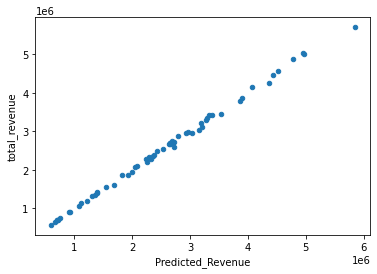

In [39]:
result.plot.scatter("Predicted_Revenue", "total_revenue")